In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
from datetime import datetime

In [2]:
df_AAPL_pnl = pd.read_csv('AAPL_run/BACK_TestAAPLLong_2022-12-15_163844_start_01-04-2021_end_07-01-2022_pnl.csv')
df_AAPL_pnl.head()

Name                         Time  Cumulative PnL
0  TestAAPLLong  2021-Jan-04 14:30:15.037812        0.000000
1  TestAAPLLong  2021-Jan-04 14:31:16.024410     -283.148336
2  TestAAPLLong  2021-Jan-04 14:32:16.962050     -374.884016
3  TestAAPLLong  2021-Jan-04 14:33:17.459131    -1098.717190
4  TestAAPLLong  2021-Jan-04 14:34:19.286742    -1845.418371

In [3]:
#test
a = datetime.strptime('2021-Jan-04 14:30:12.620528', '%Y-%b-%d %H:%M:%S.%f')

In [4]:
#eg. '2021-Jan-04 14:30:12.620528', '%Y-%b-%d %H:%M:%S.%f'
#eg. '2021-Jan-05 05:00:00', '%Y-%b-%d %H:%M:%S'
def try_parsing_date(text):
    for fmt in ('%Y-%b-%d %H:%M:%S.%f', '%Y-%b-%d %H:%M:%S'):
        try:
            return datetime.strptime(str(text), fmt)
        except ValueError:
            pass

In [5]:
df_AAPL_pnl['Time'] = df_AAPL_pnl['Time'].apply(lambda x: try_parsing_date(x))

In [6]:
df_AAPL_pnl.head()

Name                       Time  Cumulative PnL
0  TestAAPLLong 2021-01-04 14:30:15.037812        0.000000
1  TestAAPLLong 2021-01-04 14:31:16.024410     -283.148336
2  TestAAPLLong 2021-01-04 14:32:16.962050     -374.884016
3  TestAAPLLong 2021-01-04 14:33:17.459131    -1098.717190
4  TestAAPLLong 2021-01-04 14:34:19.286742    -1845.418371

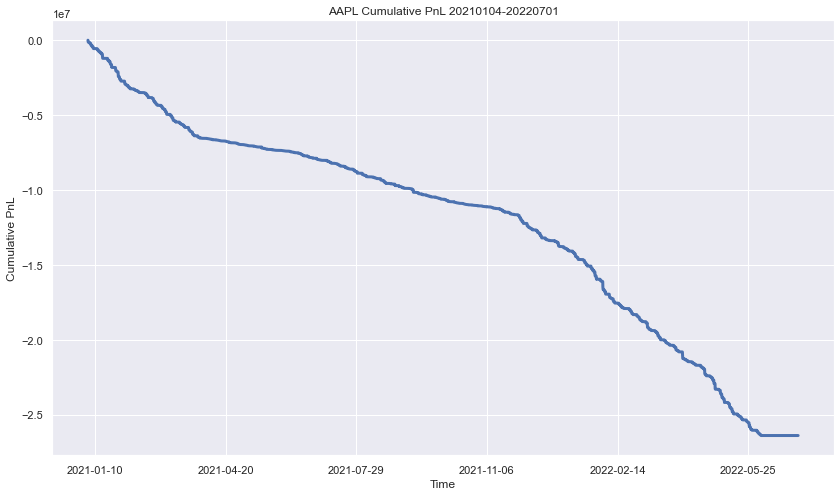

In [7]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(14,8)})

ax = sns.lineplot(data=df_AAPL_pnl, x ='Time', y = 'Cumulative PnL',
                  palette='viridis',
                  legend='full', lw=3)

ax.xaxis.set_major_locator(ticker.AutoLocator())
plt.ylabel('Cumulative PnL')
plt.xlabel('Time')
plt.title('AAPL Cumulative PnL 20210104-20220701')
plt.show()

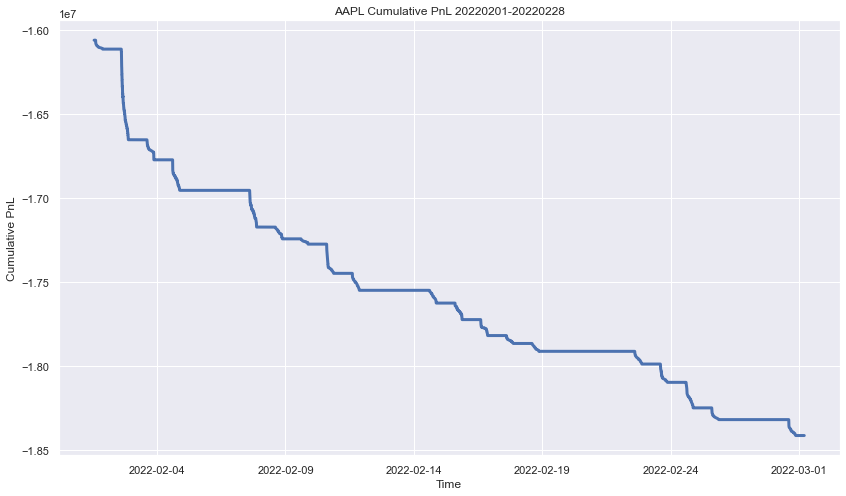

In [15]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(14,8)})

ax = sns.lineplot(data=df_AAPL_pnl.iloc[119215:127779], x ='Time', y = 'Cumulative PnL',
                  palette='viridis',
                  legend='full', lw=3)

ax.xaxis.set_major_locator(ticker.AutoLocator())
plt.ylabel('Cumulative PnL')
plt.xlabel('Time')
plt.title('AAPL Cumulative PnL 20220201-20220228')
plt.show()

In [16]:
#Position over time
df_AAPL_fill = pd.read_csv('AAPL_run/BACK_TestAAPLLong_2022-12-15_163844_start_01-04-2021_end_07-01-2022_fill.csv')
df_AAPL_fill.head()

StrategyName                    TradeTime Symbol  Quantity   Price  \
0  TestAAPLLong  2021-Jan-04 14:30:31.957037   AAPL       100  133.49   
1  TestAAPLLong  2021-Jan-04 14:30:32.007826   AAPL       100  133.48   
2  TestAAPLLong  2021-Jan-04 14:30:32.578672   AAPL       100  133.32   
3  TestAAPLLong  2021-Jan-04 14:30:32.598179   AAPL       100  133.32   
4  TestAAPLLong  2021-Jan-04 14:30:32.799180   AAPL      -300  133.23   

   ExecutionCost LiquidityAction  LiquidityCode  RawLiquidity       Account  \
0       0.120000         REMOVED              0           NaN  SIM-1001-101   
1       0.120000         REMOVED              0           NaN  SIM-1001-101   
2       0.120000         REMOVED              0           NaN  SIM-1001-101   
3       0.120000         REMOVED              0           NaN  SIM-1001-101   
4       1.255306         REMOVED              0           NaN  SIM-1001-101   

       Trader MarketCenter          OrderID  ExecID TransactionType  
0  dlariviere          IEX  364543941790923     NaN            FILL  
1  dlariviere          IEX  364543941790924     NaN            FILL  
2  dlariviere          IEX  364543941790925     NaN            FILL  
3  dlariviere          IEX  364543941790926     NaN            FILL  
4  dlariviere          IEX  364543941790927     NaN            FILL

In [17]:
df_AAPL_fill['TradeTime'] = df_AAPL_fill['TradeTime'].apply(lambda x: try_parsing_date(x))

In [18]:
df_AAPL_fill['Cur Position'] = df_AAPL_fill['Quantity'].cumsum()
df_AAPL_fill['Cur Position'].head()

0    100
1    200
2    300
3    400
4    100
Name: Cur Position, dtype: int64

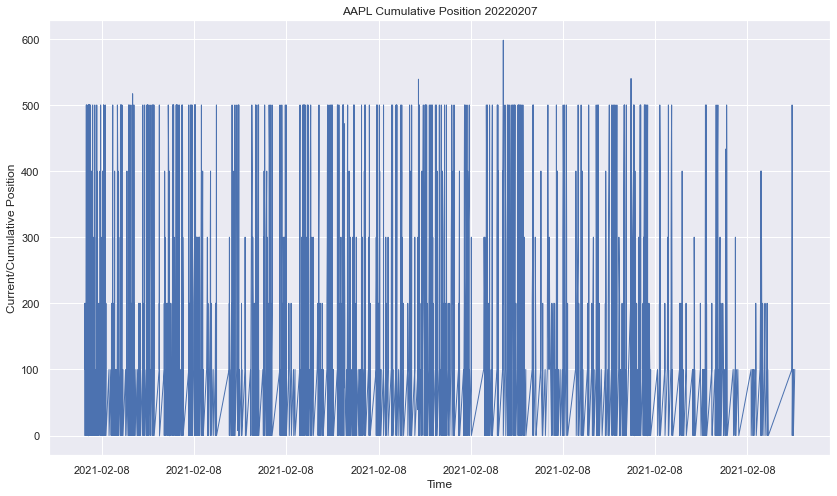

In [26]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(14,8)})

ax = sns.lineplot(data=df_AAPL_fill.iloc[106701:109990], x ='TradeTime', y = 'Cur Position',
                  palette='viridis',
                  legend='full', lw=1)

ax.xaxis.set_major_locator(ticker.MaxNLocator())
plt.ylabel('Current/Cumulative Position')
plt.xlabel('Time')
plt.title('AAPL Cumulative Position 20210208')
plt.show()

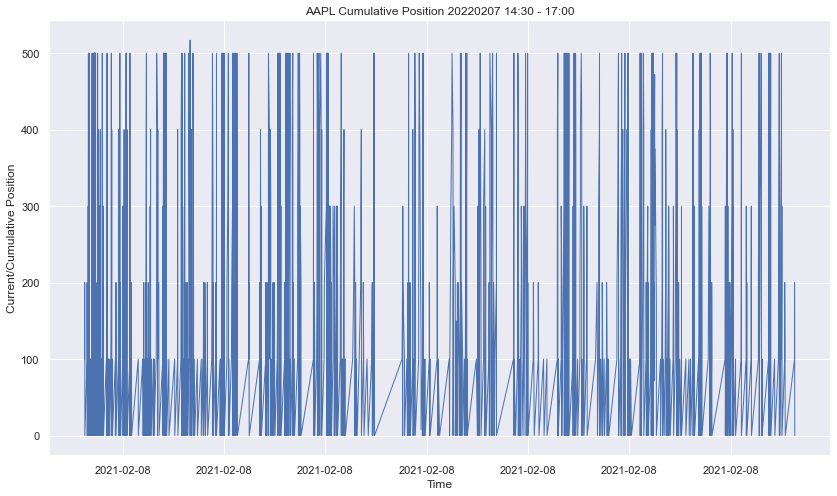

In [25]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(14,8)})

ax = sns.lineplot(data=df_AAPL_fill.iloc[106701:108744], x ='TradeTime', y = 'Cur Position',
                  palette='viridis',
                  legend='full', lw=1)

ax.xaxis.set_major_locator(ticker.MaxNLocator())
plt.ylabel('Current/Cumulative Position')
plt.xlabel('Time')
plt.title('AAPL Cumulative Position 20210208 14:30 - 17:00')
plt.show()

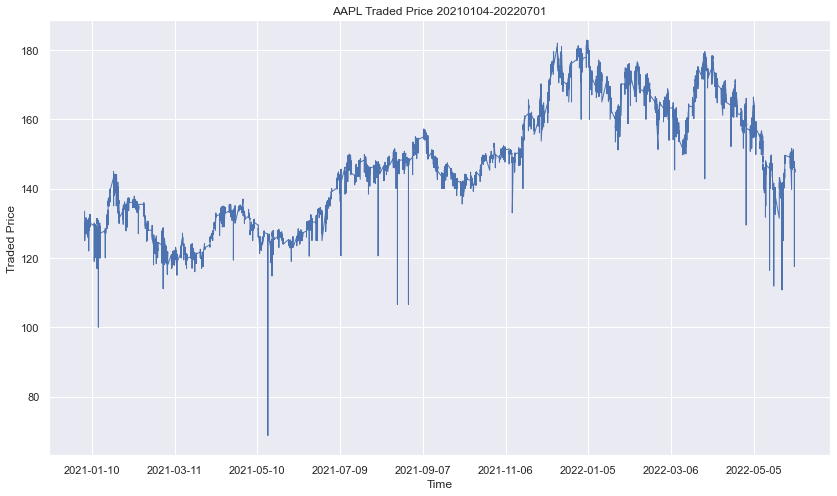

In [20]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(14,8)})

ax = sns.lineplot(data=df_AAPL_fill, x ='TradeTime', y = 'Price',
                  palette='viridis',
                  legend='full', lw=1)

ax.xaxis.set_major_locator(ticker.MaxNLocator())
plt.ylabel('Traded Price')
plt.xlabel('Time')
plt.title('AAPL Traded Price 20210104-20220701')
plt.show()

In [21]:
s = pd.to_datetime(df_AAPL_fill['TradeTime'])
df_AAPL_15D_trades_ct = s.groupby(s.dt.floor('15D')).size().reset_index(name='count')

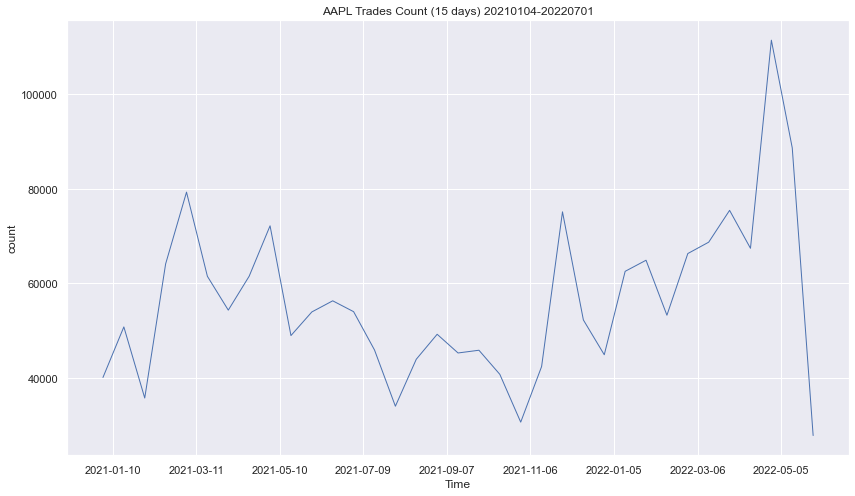

In [22]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(14,8)})

ax = sns.lineplot(data=df_AAPL_15D_trades_ct, x ='TradeTime', y = 'count',
                  palette='viridis',
                  legend='full', lw=1)

ax.xaxis.set_major_locator(ticker.MaxNLocator())
plt.ylabel('count')
plt.xlabel('Time')
plt.title('AAPL Trades Count (15 days) 20210104-20220701')
plt.show()